In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Data3.csv')
df.head() 

,X1,X2,Y
0,55,91,0
1,50,79,0
2,99,11,0
3,49,2,0
4,0,19,0


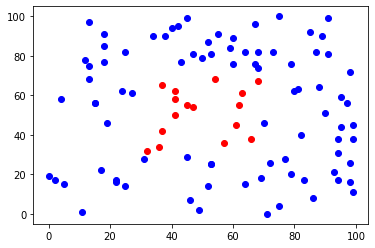

In [3]:
import matplotlib.pyplot as plt
X1=df['X1'].values.tolist()
X2=df['X2'].values.tolist()
Y=df['Y'].values.tolist()
for i in range(len(Y)):
    if Y[i]==0:
        plt.plot(X1[i],X2[i],'bo')
    else:
        plt.plot(X1[i],X2[i],'ro')

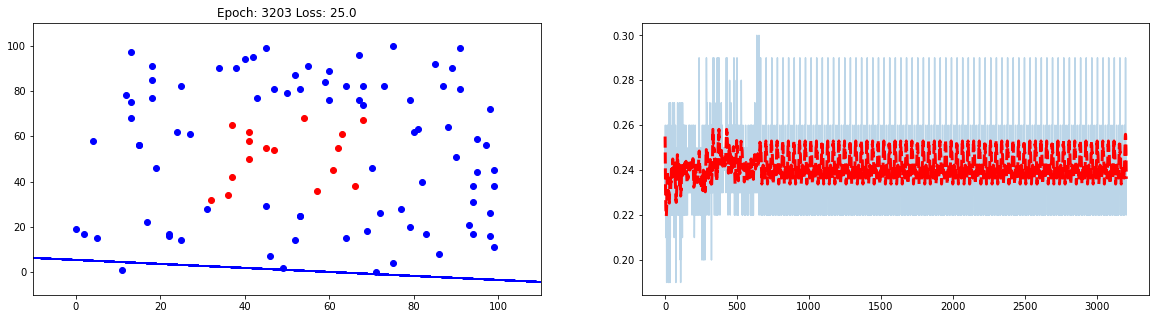

Epoch: 3203 Loss: 0.25


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from IPython import display
from scipy.signal import savgol_filter


W = [random.random(), random.random()]
b = random.random()

# W = [random.uniform(-1,1), random.uniform(-1,1)]
# b = random.uniform(-1,1)

lr = 0.1
theta=0.5

epoch = 0
count = 0


loss = []

while count < len(X1):
    
    total_error = 0
    for i in range(len(X1)):
        weighted_sum = W[0]*X1[i] + W[1]*X2[i] + b
        pred = 0
        if weighted_sum > theta:
            pred = 1

        error =  Y[i] - pred
        if error != 0:
            count = 0
            total_error += math.sqrt(error**2)
            
            W[0] += lr * error * X1[i]
            W[1] += lr * error * X2[i]
            b    += lr * error
        else:
            count += 1
    
    loss.append(1/len(X1)*total_error)
    
    plt.figure(figsize=(20,5))
    #loss.append([epoch, total_error])   
    display.clear_output(wait=True)
    plt.subplot(1,2,1)

    for i in range(len(Y)):
        if Y[i] == 0:
            plt.plot(X1[i], X2[i], "bo")
        else:
            plt.plot(X1[i], X2[i], "ro")

        plt.xlim([-10, 110])
        plt.ylim([-10, 110])

        xintr=(theta-b)/W[0]
        yintr=(theta-b)/W[1]

        slope = -yintr/xintr
        xx = plt.xlim()
#                 print(xx)
        yeq = []
        for x in xx:
            yeq.append(slope*x+yintr)
        plt.plot(xx,yeq, 'b-')

    plt.title(f"Epoch: {epoch} Loss: {total_error}")

    plt.subplot(1,2,2)
    plt.plot(loss, alpha=0.3)
    if epoch > 20:
        yhat = savgol_filter(loss, 21, 3) # window size 51, polynomial order 3
        plt.plot(yhat, 'r--', lw=3)

    plt.show()
            
    print(f"Epoch: {epoch} Loss: {loss[-1]}")
    epoch += 1